In [1]:
#Compute theoretical variance (Gaussian approx.) for power spectrum multipoles
#-> via exact binning

In [2]:
import numba as nb
import numpy as np
#from scipy.special import legendre
from math import floor
from scipy.interpolate import make_interp_spline
from matplotlib import pyplot as plt


twopi3 = (2*np.pi)**3
twopi6 = (2*np.pi)**6

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Verdana']

In [4]:
#specs

Lbox = 1500
kf = 2*np.pi/Lbox

#dk, cf, Nb are size of the bin, center of the first mode, and number of the bins respectively. 
#see also definition of kh_data

dk, cf, Nb = 1, 1, 128
#dk, cf, Nb = 2, 1.5, 64

kh_data = np.array([i*dk + cf for i in range(Nb)])*kf

print(kf, Lbox)
print(kh_data/kf)

0.0041887902047863905 1500
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128.]


In [5]:
#upload power spectrum multipoles

fname_pell = '../P_ell.txt'

k_th, p0_th, p2_th, p4_th = np.loadtxt(fname_pell, unpack=True)

In [6]:
#interpolate p_ell

p0_func = make_interp_spline(k_th, p0_th)
p2_func = make_interp_spline(k_th, p2_th)
p4_func = make_interp_spline(k_th, p4_th)

In [7]:
#preparation

kmin = cf-0.5*dk
kmax = (Nb-0.5)*dk+cf
L = int(floor(kmax))
L2 = int(kmax*kmax)

kVals2 = np.arange(3.*L*L+1.)
kVals = np.sqrt(kVals2)

p0_table = np.array([p0_func(i*kf) for i in kVals])
p2_table = np.array([p2_func(i*kf) for i in kVals])
p4_table = np.array([p4_func(i*kf) for i in kVals])

Nterms = 36
BinF = np.zeros((Nterms, Nb))
Nk   = np.zeros(Nb)

print(kh_data[Nb-1])

0.536165146212658


In [8]:
@nb.jit(nopython = True)
def R_PP(P0, P2, P4, mu, res):
    L0 = 1
    L2 = 0.5*(-1 + 3*mu*mu)
    L4 = 0.125*(3 - 30*mu*mu + 35*mu*mu*mu*mu)

    res[0]=L0*L0*L0*L0*P0*P0
    res[1]=L0*L0*L0*L2*P0*P2
    res[2]=L0*L0*L0*L4*P0*P4
    res[3]=L0*L0*L2*L2*P2*P2
    res[4]=L0*L0*L2*L4*P2*P4
    res[5]=L0*L0*L4*L4*P4*P4
    res[6]=L0*L2*L0*L0*P0*P0
    res[7]=L0*L2*L0*L2*P0*P2
    res[8]=L0*L2*L0*L4*P0*P4
    res[9]=L0*L2*L2*L2*P2*P2
    res[10]=L0*L2*L2*L4*P2*P4
    res[11]=L0*L2*L4*L4*P4*P4
    res[12]=L0*L4*L0*L0*P0*P0
    res[13]=L0*L4*L0*L2*P0*P2
    res[14]=L0*L4*L0*L4*P0*P4
    res[15]=L0*L4*L2*L2*P2*P2
    res[16]=L0*L4*L2*L4*P2*P4
    res[17]=L0*L4*L4*L4*P4*P4
    res[18]=L2*L2*L0*L0*P0*P0
    res[19]=L2*L2*L0*L2*P0*P2
    res[20]=L2*L2*L0*L4*P0*P4
    res[21]=L2*L2*L2*L2*P2*P2
    res[22]=L2*L2*L2*L4*P2*P4
    res[23]=L2*L2*L4*L4*P4*P4
    res[24]=L2*L4*L0*L0*P0*P0
    res[25]=L2*L4*L0*L2*P0*P2
    res[26]=L2*L4*L0*L4*P0*P4
    res[27]=L2*L4*L2*L2*P2*P2
    res[28]=L2*L4*L2*L4*P2*P4
    res[29]=L2*L4*L4*L4*P4*P4
    res[30]=L4*L4*L0*L0*P0*P0
    res[31]=L4*L4*L0*L2*P0*P2
    res[32]=L4*L4*L0*L4*P0*P4
    res[33]=L4*L4*L2*L2*P2*P2
    res[34]=L4*L4*L2*L4*P2*P4
    res[35]=L4*L4*L4*L4*P4*P4

In [9]:
@nb.jit(nopython = True)
def bin_POWER(L, kVals, BinF, p0_table, p2_table, p4_table, Nk, kmin, kmax, dk):
    mult = 0
    I = 0
    res = np.zeros(Nterms)
    for x in nb.prange(0, L+1):
        for y in nb.prange(0, L+1):
            for z in nb.prange(0, L+1):
                k2 = x*x+y*y+z*z
                k  = kVals[k2]
                if k == 0:
                    mu = 1
                else:
                    mu = z/k
                
                if kmin <= k <= kmax:
                    mult = 8 >> (int(x == 0) + int(y == 0) + int(z == 0))
                    I = int((k - kmin)/dk)

                    P0 = p0_table[k2]
                    P2 = p2_table[k2]
                    P4 = p4_table[k2]

                    R_PP(P0, P2, P4, mu, res)
                    for h in range(len(res)):
                        BinF[h, I] += res[h]*mult
                                      
                    #BinF[I] += mult*(p0_table[k2] + p2_table[k2]*legendre_2(mu) + p4_table[k2]*legendre_4(mu))\
                    #              *legendre_4(mu)*(2*4 + 1)                                  
                    Nk[I]   += mult

bin_POWER(L, kVals, BinF, p0_table, p2_table, p4_table, Nk, kmin, kmax, dk)
BinF /= Nk

In [10]:
print((Nk).astype(int))

[    18     62     98    210    350    450    602    762   1142   1250
   1458   1814   2178   2498   2622   3338   3722   4170   4358   5034
   5714   5982   6602   7130   8034   8606   9066   9962  10550  11226
  12146  12606  13802  14754  15194  16454  17154  18266  18750  20234
  21450  21962  23462  24042  25946  26118  27506  29066  30450  31742
  32250  34250  35454  36434  37682  39294  41426  42066  43490  45702
  46634  48554  48870  51554  54090  54314  56910  57482  60626  61206
  62570  65730  66686  69698  70026  72746  74910  75722  78378  80030
  83186  84666  86546  88134  91538  93138  94478  97274  99690 102590
 103770 106346 108546 110726 112322 115890 118766 122298 122090 125810
 128190 130994 133722 133886 140538 140594 143594 146310 150650 151914
 153398 157866 160658 164102 164994 169850 172986 173894 176778 181802
 184430 187242 190250 192570 198254 198074 202050 205502]


In [11]:
print(np.shape(BinF))

(36, 128)


In [12]:
sym_count = [1, 2, 2, 1, 2, 1]
comm_fact = 1#(2*np.pi)**3/kf**3
num_k = Nk

C00 = np.zeros(Nb)
C02 = np.zeros(Nb)
C04 = np.zeros(Nb)
C22 = np.zeros(Nb)
C24 = np.zeros(Nb)
C44 = np.zeros(Nb)

for i in range(0, 6):
    C00 += BinF[i,:]*sym_count[i]
    C02 += BinF[i+6,:]*sym_count[i]
    C04 += BinF[i+12,:]*sym_count[i]
    C22 += BinF[i+18,:]*sym_count[i]
    C24 += BinF[i+24,:]*sym_count[i]
    C44 += BinF[i+30,:]*sym_count[i]

C00 = C00*2*(2*0+1)*(2*0+1)/num_k*comm_fact
C02 = C02*2*(2*0+1)*(2*2+1)/num_k*comm_fact
C04 = C04*2*(2*0+1)*(2*4+1)/num_k*comm_fact
C22 = C22*2*(2*2+1)*(2*2+1)/num_k*comm_fact
C24 = C24*2*(2*2+1)*(2*4+1)/num_k*comm_fact
C44 = C44*2*(2*4+1)*(2*4+1)/num_k*comm_fact

#C00 = BinF[0, :]*2*(2*0+1)*(2*0+1)/num_k*comm_fact

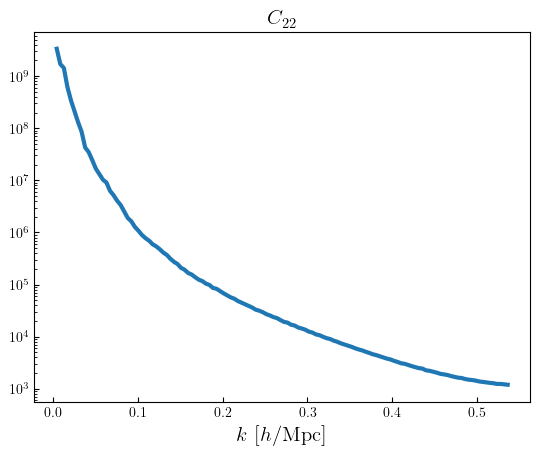

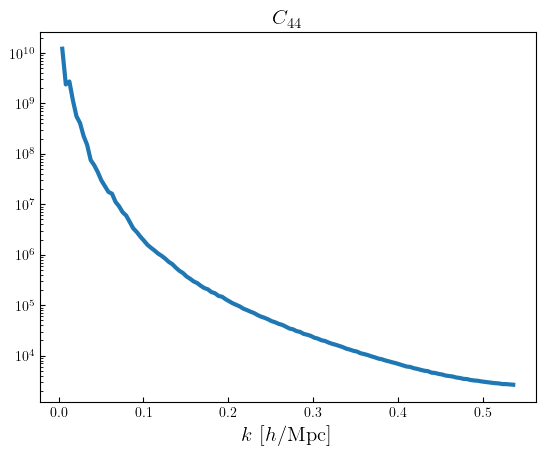

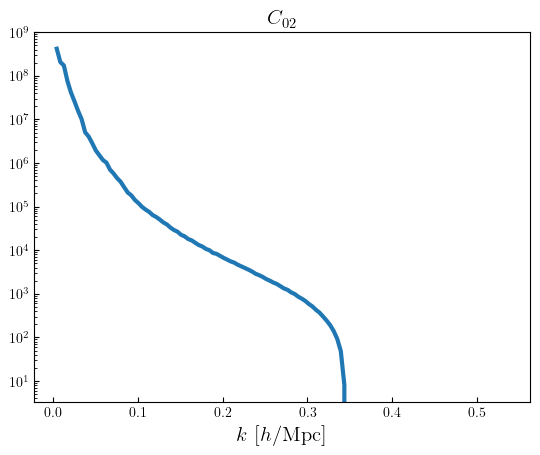

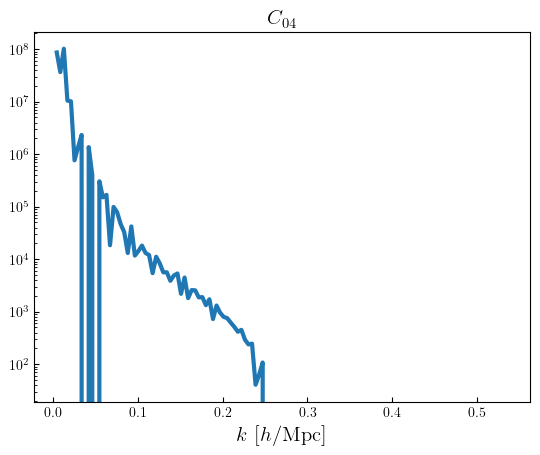

In [13]:
ftsize = 15

plt.plot(kh_data, C00, lw = 3)
plt.yscale('log')
plt.title('$C_{00}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C22, lw = 3)
plt.yscale('log')
plt.title('$C_{22}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C44, lw = 3)
plt.yscale('log')
plt.title('$C_{44}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C02, lw = 3)
plt.yscale('log')
plt.title('$C_{02}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C04, lw = 3)
plt.yscale('log')
plt.title('$C_{04}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

plt.plot(kh_data, C24, lw = 3)
plt.yscale('log')
plt.title('$C_{24}$', fontsize=ftsize)
plt.xlabel('$k~[h/\mathrm{Mpc}]$', fontsize=ftsize)
plt.show()

In [14]:
#save file

C = np.vstack([C00, C02, C04, C22, C24, C44])
print(np.shape(C))

fname =  'CovP_Gauss_Binned.dat'
print(fname)

np.savetxt(fname, np.transpose(C), header="C00, C02, C04, C22, C24, C44")

(6, 128)
CovP_Gauss_Binned.dat
